In [1]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import GlobalMaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras.preprocessing import image

Using TensorFlow backend.


## 0. Basics
- Input of image-format data is usually 4-D array in Tensorflow
<br> **(num_instance, width, height, depth)** </br>
    - **num_instance:** number of data instances. Usually designated as **None** to accomodate fluctuating data size
    - **width:** width of an image
    - **height:** height of an image
    - **depth:** depth of an image. Color images are usually with depth = 3 (3 channels for RGB). Black/white images are usually with depth = 1 (only one channel)
    
<img src="http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png" style="width: 400px"/>

- Loading image
    - Images can be loaded using load_img() function
    - Images can be converted to numpy array using img_to_array() function

In [4]:
img = image.load_img('./data/dog.jpg', target_size = (100, 100))

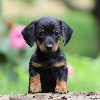

In [6]:
img

In [7]:
img = image.img_to_array(img)

In [8]:
print(img.shape)

(100, 100, 3)


## Convolution: FIlter/kernels
### No padding, no strides
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

In [9]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid')

## Padding
### ZeroPadding
Customized paddings can be given with ZeroPadding**n**D layer

In [ ]:
# user-customized padding
input_layer = Input(shape = (10, 10, 3))
padding_layer = ZeroPadding2D(padding = (1,1))(input_layer)

model = Model(inputs = input_layer, outputs = padding_layer)

### Padding: same
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same')

## Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif)

In [ ]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (2,2), padding = 'valid')

## Padding+Stride

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/padding_strides.gif)

### Dilated convolution

In [16]:
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1),
       padding = 'same', dilation_rate=(1, 1))

![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/dilation.gif)

## Pooling
- Usually, max pooling is applied for rectangular region
- pooling size, padding type, and strides can be set similar to convolutional layer
![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

### MaxPooling layer

<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [25]:
# when 'strides' parameter is not defined, strides are equal to 'pool_size'
MaxPooling2D(pool_size = (2,2), padding = 'valid')

### So a 2D Convolutional Layer Includes:
- Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
- Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
- Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
- Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)

<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

[ref](https://keras.io/layers/convolutional/)

### Convolution+Pooling

In [30]:
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = (1,1), padding = 'valid'))

In [33]:
# globalmaxpooling performs maxpooling over whole channel with depth = 1
Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same')
GlobalMaxPooling2D()

## 4. Flattening
- To be connected to fully connected layer (dense layer), convolutional/pooling layer should be **"flattened"**
- Resulting shape = **(Number of instances, width X height X depth)**

In [42]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

In [43]:
print(model.output_shape)

(None, 10, 10, 10)


In [44]:
model.add(Flatten())

In [45]:
print(model.output_shape)

(None, 1000)


## 5. Fully Connected (Dense)
- After flattening layer, fully connected layer can be added
- output shape (number of nodes) should be designated

In [46]:
model = Sequential()
model.add(Conv2D(input_shape = (10, 10, 3), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))
model.add(Flatten())
model.add(Dense(50))

In [47]:
print(model.output_shape)

(None, 50)


## A bit deeper:
- Weight Initialization
- Batch Normalization
- l1 and l2 regularizations
- Dropout (Regularization)

In [1]:
import matplotlib.pyplot as plt

import numpy as np
from keras.models import Model
from keras.layers import Input, Dense,BatchNormalization, Dropout

Using TensorFlow backend.


### Initialization

In [14]:
def init1(shape, dtype=None):
    print(shape)
#     return np.array([2]).reshape(shape).astype(dtype)
#     return np.random.normal(0,1,shape).reshape(shape).astype(dtype)
    return np.zeros(shape).reshape(shape).astype(dtype)

def init2(shape, dtype=None):
    print(shape)
#     return np.array([1]).reshape(shape).astype(dtype)
#     return np.random.normal(0,1,shape).reshape(shape).astype(dtype)
    return np.ones(shape).reshape(shape).astype(dtype)

In [15]:
x1 = Input(shape=(1,))
x2 = Dense(10, kernel_initializer=init1, bias_initializer=init2)(x1)

model = Model(inputs=x1,outputs=x2)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(1, 10)
(10,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.predict([1])

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)

### Batch Normalization

![](https://www.researchgate.net/profile/Tali_Leibovich-Raveh/publication/325868989/figure/fig2/AS:639475206074368@1529474178211/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing.png)

In [17]:
def init1(shape, dtype=None):
    print(shape)
    return np.array([2,2,2]).reshape(shape).astype(dtype)

x1 = Input(shape=(3,))
x2 = Dense(1, kernel_initializer=init1)(x1)
x3 = BatchNormalization()(x2)

model = Model(inputs=x1,outputs=x3)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(3, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1)                 4         
Total params: 8
Trainable params: 6
Non-trainable params: 2
_________________________________________________________________


### Dropout

![](https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png)

In [36]:
def init1(shape, dtype=None):
    print(shape)
#     return np.array(10*[2]).reshape(shape).astype(dtype)
    return np.arange(shape[0]*shape[1]).reshape(shape).astype(dtype)

x1 = Input(shape=(10,))
x2 = Dense(10, kernel_initializer=init1)(x1)
x3 = Dropout(0.5)(x2, training=True)
x4 = Dense(1, kernel_initializer=init1)(x3)
x5 = Dropout(0.5)(x4, training=True)

model = Model(inputs=x1,outputs=x5)
model.compile(optimizer = 'sgd', loss = 'mse')
model.summary()

(10, 10)
(10, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
_________________________________________________________________
dropout_6 (Dropout)          (None, 1)                 0         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.predict(np.array(10*[1]).reshape(1,10))

array([[39280.]], dtype=float32)

In [36]:
# def init1(shape, dtype=None):
#     print(shape)
#     nn = shape[0]*shape[1]
#     ws = np.array(nn*[1./nn]).reshape(shape).astype(dtype)
# #     print(ws)
#     return ws

# x1 = Input(shape=(1000,))
# x2 = Dense(1, kernel_initializer=init1)(x1)
# x3 = BatchNormalization()(x2)

# model = Model(inputs=x1,outputs=x3)
# model.compile(optimizer = 'sgd', loss = 'mse')
# model.summary()

In [37]:
# x = np.random.normal(100,1,1000)
# y = model.predict(x.reshape(1,1000))
# y.mean()

In [38]:
# hist, bin_edges = np.histogram(y.reshape(-1),100)
# bin_c = 0.5*(bin_edges[1:]+bin_edges[:1])

In [39]:
# plt.plot(bin_c,hist)
# # plt.xlim(-5,5)

### Regularizers

![](https://miro.medium.com/max/2546/1*zMLv7EHYtjfr94JOBzjqTA.png)

In [ ]:
from keras.regularizers import l1,l2,l1_l2

In [ ]:
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=l2(0.01),
                bias_regularizer=l1(0.01)))

In [ ]:
l1(0.)
l2(0.)
l1_l2(l1=0.01, l2=0.01)

In [ ]:
from keras import backend as K

def l1_reg(weight_matrix):
    return 0.01 * K.sum(K.abs(weight_matrix))

model.add(Dense(64, input_dim=64,
                kernel_regularizer=l1_reg))


# Advanced Convolutional Neural Networks (CNN)
- Objective: try different structures of CNNs

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper
<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

# Convolutional Neural Networks (CNN)

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

### What will happen to an image:

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 1000px"/>

### Convolution is able to understand the objective in a hierarchy of concepts!

<img src="https://images.anandtech.com/doci/12673/feature_hierarchy_575px.png" style="width: 1000px"/>

### The whole story:

<img src="https://devblogs.nvidia.com/wp-content/uploads/2015/11/fig1.png" style="width: 1000px"/>